##### Copyright 2023 The TF-Agents Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# REINFORCE agent

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/agents/tutorials/6_reinforce_tutorial">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/6_reinforce_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/6_reinforce_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/agents/docs/tutorials/6_reinforce_tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction

This example shows how to train a [REINFORCE](https://www-anw.cs.umass.edu/~barto/courses/cs687/williams92simple.pdf) agent on the Cartpole environment using the TF-Agents library, similar to the [DQN tutorial](1_dqn_tutorial.ipynb).

![Cartpole environment](images/cartpole.png)

We will walk you through all the components in a Reinforcement Learning (RL) pipeline for training, evaluation and data collection.


## Setup

If you haven't installed the following dependencies, run:

In [2]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents[reverb]
!pip install pyglet xvfbwrapper


0% [Working]

Hit:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease
Get:4 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:6 https://download.docker.com/linux/ubuntu focal InRelease
Hit:7 https://nvidia.github.io/libnvidia-container/stable/ubuntu18.04/amd64  InRelease
Hit:8 https://nvidia.github.io/nvidia-container-runtime/stable/ubuntu18.04/amd64  InRelease
Hit:9 https://nvidia.github.io/nvidia-docker/ubuntu18.04/amd64  InRelease
0% [Connected to apt.llvm.org (199.232.198.49)] [Connecting to security.ubuntu.

Hit:1 https://apt.llvm.org/focal llvm-toolchain-focal-14 InRelease
0% [Connecting to security.ubuntu.com (185.125.190.36)] [Connecting to ppa.laun

Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://security.ubuntu.com/ubuntu focal-security InRelease
0% [Connecting to ppa.launchpad.net (185.125.190.52)]

0% [Connecting to ppa.launchpad.net (185.125.190.52)]

0% [Waiting for headers]

Hit:12 http://ppa.launchpad.net/longsleep/golang-backports/ubuntu focal InRelease
0% [Connecting to ppa.launchpad.net (185.125.190.52)]

0% [Waiting for headers]

Hit:13 http://ppa.launchpad.net/openjdk-r/ppa/ubuntu focal InRelease
0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

0% [Working]

Fetched 108 kB in 1s (78.9 kB/s)


freeglut3-dev is already the newest version (2.8.1-3).
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
xvfb is already the newest version (2:1.20.13-1ubuntu1~20.04.6).


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0 libxmlb2
Use 'sudo apt autoremove' to remove them.


0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.


  Using cached imageio-2.4.0-py3-none-any.whl


  Attempting uninstall: imageio
    Found existing installation: imageio 2.25.1


    Uninstalling imageio-2.25.1:
      Successfully uninstalled imageio-2.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.19.3 requires imageio>=2.4.1, but you have imageio 2.4.0 which is incompatible.


  Using cached PyVirtualDisplay-3.0-py3-none-any.whl (15 kB)


  Using cached tf_agents-0.15.0-py3-none-any.whl (1.4 MB)


  Using cached gym-0.23.0-py3-none-any.whl


  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)


  Using cached pygame-2.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


  Using cached tensorflow_probability-0.19.0-py2.py3-none-any.whl (6.7 MB)


  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)
  Using cached dm_reverb-0.10.0-cp39-cp39-manylinux2014_x86_64.whl (6.3 MB)


  Using cached tensorflow-2.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)


  Using cached rlds-0.1.7-py3-none-manylinux2010_x86_64.whl (48 kB)


  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)


  Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)


  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)


  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached portpicker-1.5.2-py3-none-any.whl (14 kB)


  Using cached gym_notices-0.0.8-py3-none-any.whl (3.0 kB)


  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)


  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0rc0


    Uninstalling tensorflow-estimator-2.12.0rc0:
      Successfully uninstalled tensorflow-estimator-2.12.0rc0


  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0


  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3


    Uninstalling protobuf-3.20.3:


      Successfully uninstalled protobuf-3.20.3


  Attempting uninstall: keras
    Found existing installation: keras 2.12.0rc0


    Uninstalling keras-2.12.0rc0:
      Successfully uninstalled keras-2.12.0rc0


  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0


    Uninstalling tensorboard-2.12.0:
      Successfully uninstalled tensorboard-2.12.0


  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.0rc0


    Uninstalling tensorflow-2.12.0rc0:


      Successfully uninstalled tensorflow-2.12.0rc0


In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import base64
import imageio
import IPython
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay
import reverb

import tensorflow as tf

from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.drivers import py_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.networks import actor_distribution_network
from tf_agents.policies import py_tf_eager_policy
from tf_agents.replay_buffers import reverb_replay_buffer
from tf_agents.replay_buffers import reverb_utils
from tf_agents.specs import tensor_spec
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

2023-02-16 13:38:03.217137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-16 13:38:03.217245: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-16 13:38:03.217255: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## Hyperparameters

In [4]:
env_name = "CartPole-v0" # @param {type:"string"}
num_iterations = 250 # @param {type:"integer"}
collect_episodes_per_iteration = 2 # @param {type:"integer"}
replay_buffer_capacity = 2000 # @param {type:"integer"}

fc_layer_params = (100,)

learning_rate = 1e-3 # @param {type:"number"}
log_interval = 25 # @param {type:"integer"}
num_eval_episodes = 10 # @param {type:"integer"}
eval_interval = 50 # @param {type:"integer"}

## Environment

Environments in RL represent the task or problem that we are trying to solve. Standard environments can be easily created in TF-Agents using `suites`. We have different `suites` for loading environments from sources such as the OpenAI Gym, Atari, DM Control, etc., given a string environment name.

Now let us load the CartPole environment from the OpenAI Gym suite.

In [5]:
env = suite_gym.load(env_name)

We can render this environment to see how it looks. A free-swinging pole is attached to a cart.  The goal is to move the cart right or left in order to keep the pole pointing up.

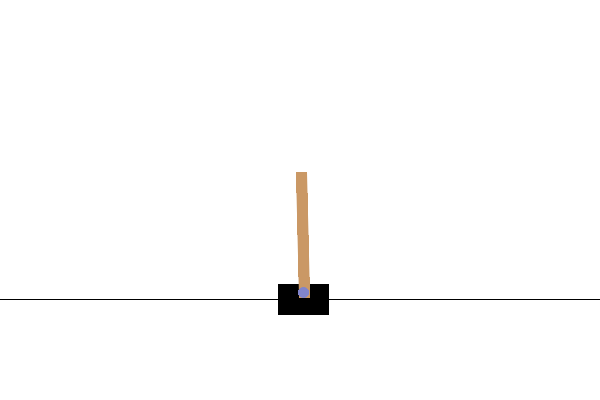

In [6]:
#@test {"skip": true}
env.reset()
PIL.Image.fromarray(env.render())

The `time_step = environment.step(action)` statement takes `action` in the environment.  The `TimeStep` tuple returned contains the environment's next observation and reward for that action. The `time_step_spec()` and `action_spec()` methods in the environment return the specifications (types, shapes, bounds) of the `time_step` and `action` respectively.

In [7]:
print('Observation Spec:')
print(env.time_step_spec().observation)
print('Action Spec:')
print(env.action_spec())

Observation Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='observation', minimum=[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], maximum=[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38])
Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=1)


So, we see that observation is an array of 4 floats: the position and velocity of the cart, and the angular position and velocity of the pole. Since only two actions are possible (move left or move right), the `action_spec` is a scalar where 0 means "move left" and 1 means "move right."

In [8]:
time_step = env.reset()
print('Time step:')
print(time_step)

action = np.array(1, dtype=np.int32)

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)

Time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([-0.00936952,  0.03431276,  0.01222295, -0.03050506], dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})
Next time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([-0.00868327,  0.22925732,  0.01161285, -0.31930658], dtype=float32),
 'reward': array(1., dtype=float32),
 'step_type': array(1, dtype=int32)})


Usually we create two environments: one for training and one for evaluation. Most environments are written in pure python, but they can be easily converted to TensorFlow using the `TFPyEnvironment` wrapper. The original environment's API uses numpy arrays, the `TFPyEnvironment` converts these to/from `Tensors` for you to more easily interact with TensorFlow policies and agents.


In [9]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

## Agent

The algorithm that we use to solve an RL problem is represented as an `Agent`. In addition to the REINFORCE agent, TF-Agents provides standard implementations of a variety of `Agents` such as [DQN](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf), [DDPG](https://arxiv.org/pdf/1509.02971.pdf), [TD3](https://arxiv.org/pdf/1802.09477.pdf), [PPO](https://arxiv.org/abs/1707.06347) and [SAC](https://arxiv.org/abs/1801.01290).

To create a REINFORCE Agent, we first need an `Actor Network` that can learn to predict the action given an observation from the environment.

We can easily create an `Actor Network` using the specs of the observations and actions. We can specify the layers in the network which, in this example, is the `fc_layer_params` argument set to a tuple of `ints` representing the sizes of each hidden layer (see the Hyperparameters section above).


In [10]:
actor_net = actor_distribution_network.ActorDistributionNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)

We also need an `optimizer` to train the network we just created, and a `train_step_counter` variable to keep track of how many times the network was updated.


In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

tf_agent = reinforce_agent.ReinforceAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    actor_network=actor_net,
    optimizer=optimizer,
    normalize_returns=True,
    train_step_counter=train_step_counter)
tf_agent.initialize()

## Policies

In TF-Agents, policies represent the standard notion of policies in RL: given a `time_step` produce an action or a distribution over actions. The main method is `policy_step = policy.action(time_step)` where `policy_step` is a named tuple `PolicyStep(action, state, info)`.  The `policy_step.action` is the `action` to be applied to the environment, `state` represents the state for stateful (RNN) policies and `info` may contain auxiliary information such as log probabilities of the actions.

Agents contain two policies: the main policy that is used for evaluation/deployment (agent.policy) and another policy that is used for data collection (agent.collect_policy).

In [12]:
eval_policy = tf_agent.policy
collect_policy = tf_agent.collect_policy

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode, and we usually average this over a few episodes. We can compute the average return metric as follows.


In [13]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


# Please also see the metrics module for standard implementations of different
# metrics.

## Replay Buffer

In order to keep track of the data collected from the environment, we will use [Reverb](https://deepmind.com/research/open-source/Reverb), an efficient, extensible, and easy-to-use replay system by Deepmind. It stores experience data when we collect trajectories and is consumed during training.

This replay buffer is constructed using specs describing the tensors that are to be stored, which can be obtained from the agent using `tf_agent.collect_data_spec`.

In [14]:
table_name = 'uniform_table'
replay_buffer_signature = tensor_spec.from_spec(
      tf_agent.collect_data_spec)
replay_buffer_signature = tensor_spec.add_outer_dim(
      replay_buffer_signature)
table = reverb.Table(
    table_name,
    max_size=replay_buffer_capacity,
    sampler=reverb.selectors.Uniform(),
    remover=reverb.selectors.Fifo(),
    rate_limiter=reverb.rate_limiters.MinSize(1),
    signature=replay_buffer_signature)

reverb_server = reverb.Server([table])

replay_buffer = reverb_replay_buffer.ReverbReplayBuffer(
    tf_agent.collect_data_spec,
    table_name=table_name,
    sequence_length=None,
    local_server=reverb_server)

rb_observer = reverb_utils.ReverbAddEpisodeObserver(
    replay_buffer.py_client,
    table_name,
    replay_buffer_capacity
)

[reverb/cc/platform/tfrecord_checkpointer.cc:162]  Initializing TFRecordCheckpointer in /tmpfs/tmp/tmphr1_o7dx.
[reverb/cc/platform/tfrecord_checkpointer.cc:567] Loading latest checkpoint from /tmpfs/tmp/tmphr1_o7dx
[reverb/cc/platform/default/server.cc:71] Started replay server on port 38009


For most agents, the `collect_data_spec` is a `Trajectory` named tuple containing the observation, action, reward etc.

## Data Collection

As REINFORCE learns from whole episodes, we define a function to collect an episode using the given data collection policy and save the data (observations, actions, rewards etc.) as trajectories in the replay buffer. Here we are using 'PyDriver' to run the experience collecting loop. You can learn more about TF Agents driver in our [drivers tutorial](https://www.tensorflow.org/agents/tutorials/4_drivers_tutorial).

In [15]:
#@test {"skip": true}

def collect_episode(environment, policy, num_episodes):

  driver = py_driver.PyDriver(
    environment,
    py_tf_eager_policy.PyTFEagerPolicy(
      policy, use_tf_function=True),
    [rb_observer],
    max_episodes=num_episodes)
  initial_time_step = environment.reset()
  driver.run(initial_time_step)

## Training the agent

The training loop involves both collecting data from the environment and optimizing the agent's networks. Along the way, we will occasionally evaluate the agent's policy to see how we are doing.

The following will take ~3 minutes to run.

In [16]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
tf_agent.train = common.function(tf_agent.train)

# Reset the train step
tf_agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, tf_agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few episodes using collect_policy and save to the replay buffer.
  collect_episode(
      train_py_env, tf_agent.collect_policy, collect_episodes_per_iteration)

  # Use data from the buffer and update the agent's network.
  iterator = iter(replay_buffer.as_dataset(sample_batch_size=1))
  trajectories, _ = next(iterator)
  train_loss = tf_agent.train(experience=trajectories)  

  replay_buffer.clear()

  step = tf_agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss.loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, tf_agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (24514) so Table uniform_table is accessed directly without gRPC.


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (24514) so Table uniform_table is accessed directly without gRPC.


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (24514) so Table uniform_table is accessed directly without gRPC.


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (24514) so Table uniform_table is accessed directly without gRPC.


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (24514) so Table uniform_table is accessed directly without gRPC.


step = 25: loss = 0.9861669540405273


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (24514) so Table uniform_table is accessed directly without gRPC.


step = 50: loss = 0.9843673706054688


step = 50: Average Return = 64.0999984741211


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (24514) so Table uniform_table is accessed directly without gRPC.


step = 75: loss = 1.5301165580749512


step = 100: loss = 1.4956693649291992


step = 100: Average Return = 65.5999984741211


step = 125: loss = 0.6575198173522949


[reverb/cc/client.cc:165] Sampler and server are owned by the same process (24514) so Table uniform_table is accessed directly without gRPC.


step = 150: loss = -0.28385305404663086


step = 150: Average Return = 64.69999694824219


step = 175: loss = 0.7194256782531738


step = 200: loss = 1.206587791442871


step = 200: Average Return = 157.8000030517578


step = 225: loss = 0.21189308166503906


step = 250: loss = -3.2292251586914062


step = 250: Average Return = 200.0


## Visualization


### Plots

We can plot return vs global steps to see the performance of our agent. In `Cartpole-v0`, the environment gives a reward of +1 for every time step the pole stays up, and since the maximum number of steps is 200, the maximum possible return is also 200.

(54.36499919891357, 250.0)

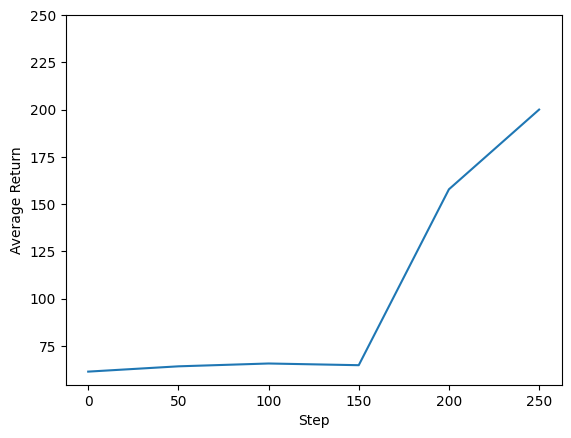

In [17]:
#@test {"skip": true}

steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, returns)
plt.ylabel('Average Return')
plt.xlabel('Step')
plt.ylim(top=250)

### Videos

It is helpful to visualize the performance of an agent by rendering the environment at each step. Before we do that, let us first create a function to embed videos in this colab.

In [18]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

The following code visualizes the agent's policy for a few episodes:

In [19]:
num_episodes = 3
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = tf_agent.policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)

[swscaler @ 0x564c350d9880] Warning: data is not aligned! This can lead to a speed loss
